# Sketchbook for NLP Project

## Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import unicodedata
import re
import json

import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords

from sklearn.model_selection import train_test_split

import prepare
import explore

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# default viz size settings
plt.rc('figure', figsize=(9, 7))
plt.rc('font', size=13)

from wordcloud import WordCloud

In [2]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /Users/a666/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Acquire

In [3]:
df = pd.read_json('data.json')
df

,repo,language,readme_contents
0,gocodeup/codeup-setup-script,Shell,# Codeup Setup Script\n\nSetup script for Code...
1,gocodeup/movies-application,JavaScript,"# Movies Application\n\nFor this project, we w..."
2,torvalds/linux,C,Linux kernel\n============\n\nThere are severa...
3,beetbox/beets,Python,.. image:: https://img.shields.io/pypi/v/beets...
4,scottschiller/SoundManager2,JavaScript,# SoundManager 2: JavaScript Sound for the Web...
...,...,...,...
175,ArbiterLib/Arbiter,C++,# Arbiter [![Build Status](https://travis-ci.o...
176,laurentlb/Ctrl-Alt-Test,C++,# Ctrl-Alt-Test\n\n[ctrl-alt-test.fr](http://c...
177,memo/ofxKinect-demos,C++,/*\n A bunch of demos for using Kinect with op...
178,lluisgomez/text_extraction,C++,text_extraction\n===============\n\nThis code ...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   repo             180 non-null    object
 1   language         169 non-null    object
 2   readme_contents  179 non-null    object
dtypes: object(3)
memory usage: 4.3+ KB


In [5]:
df[df.language.isna()]

,repo,language,readme_contents
54,Greenstand/Development-Overview,None,# Welcome to Greenstand's Treetracker project\...
68,Data4Democracy/ethics-resources,None,# Global Data Ethics Pledge (GDEP)\n---\n\n## ...
81,jbhuang0604/awesome-computer-vision,None,\n# Awesome Computer Vision: [![Awesome](https...
85,beamandrew/medical-data,None,# Medical Data for Machine Learning\nThis is a...
86,src-d/awesome-machine-learning-on-source-code,None,# Awesome Machine Learning On Source Code [![A...
88,keon/awesome-nlp,None,# 令人讚嘆的自然語言處理 [![Awesome](https://cdn.rawgit.c...
90,aikorea/awesome-rl,None,# Awesome Reinforcement Learning [![Awesome](...
102,gokceneraslan/awesome-deepbio,None,# Awesome DeepBio [![Awesome](https://cdn.rawg...
105,ujjwalkarn/Machine-Learning-Tutorials,None,\n# Machine Learning & Deep Learning Tutorials...
106,ChristosChristofidis/awesome-deep-learning,None,﻿# Awesome Deep Learning [![Awesome](https://c...


## Prepare

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   repo             180 non-null    object
 1   language         169 non-null    object
 2   readme_contents  179 non-null    object
dtypes: object(3)
memory usage: 4.3+ KB


Prepare the DataFrame with the text article title, original text, stemmed text, lemmatized text, cleaned, tokenized, & lemmatized text with stopwords removed. Also drops nulls.

In [7]:
df = prepare.prep_data(df, 'readme_contents')
df

,repo,language,readme_contents,stemmed,lemmatized,clean,stopwords_removed,doc_length,words
0,gocodeup/movies-application,JavaScript,"# Movies Application\n\nFor this project, we w...",movi applic for thi project we will be build a...,movie application for this project we will be ...,movie application building single page movie a...,367,417,"[movie, application, building, single, page, m..."
1,torvalds/linux,C,Linux kernel\n============\n\nThere are severa...,linux kernel there are sever guid for kernel d...,linux kernel there are several guide for kerne...,linux kernel several guide kernel developer us...,39,71,"[linux, kernel, several, guide, kernel, develo..."
2,beetbox/beets,Python,.. image:: https://img.shields.io/pypi/v/beets...,imag http img shield io pypi v beet svg target...,image http img shield io pypi v beet svg targe...,image http img shield io pypi v beet svg targe...,205,518,"[image, http, img, shield, io, pypibeet, svg, ..."
3,scottschiller/SoundManager2,JavaScript,# SoundManager 2: JavaScript Sound for the Web...,soundmanag javascript sound for the web by wra...,soundmanager javascript sound for the web by w...,soundmanager javascript sound web wrapping ext...,316,603,"[soundmanager, javascript, sound, web, wrappin..."
4,CreateJS/SoundJS,JavaScript,# SoundJS\r\n\r\nSoundJS is a library to make ...,soundj soundj is a librari to make work with a...,soundjs soundjs is a library to make working w...,soundjs soundjs make working audio web easier ...,160,350,"[soundjs, soundjs, make, working, audio, web, ..."
...,...,...,...,...,...,...,...,...,...
158,ArbiterLib/Arbiter,C++,# Arbiter [![Build Status](https://travis-ci.o...,arbit build statu http travi ci org arbiterlib...,arbiter build status http travis ci org arbite...,arbiter build status http travis ci org arbite...,343,483,"[arbiter, build, status, http, travis, ci, org..."
159,laurentlb/Ctrl-Alt-Test,C++,# Ctrl-Alt-Test\n\n[ctrl-alt-test.fr](http://c...,ctrl alt test ctrl alt test fr http ctrl alt t...,ctrl alt test ctrl alt test fr http ctrl alt t...,ctrl alt test ctrl alt test fr http ctrl alt t...,13,82,"[ctrl, alt, test, ctrl, alt, test, fr, http, c..."
160,memo/ofxKinect-demos,C++,/*\n A bunch of demos for using Kinect with op...,a bunch of demo for use kinect with openframew...,a bunch of demo for using kinect with openfram...,bunch demo using kinect openframeworks copyrig...,25,58,"[bunch, demo, using, kinect, openframeworks, c..."
161,lluisgomez/text_extraction,C++,text_extraction\n===============\n\nThis code ...,text extract thi code is the implement of the ...,text extraction this code is the implementatio...,text extraction code implementation method pro...,38,95,"[text, extraction, code, implementation, metho..."


Summarize data

In [8]:
df.language.value_counts()

HTML                30
JavaScript          28
C++                 28
Python              28
Ruby                28
Jupyter Notebook     6
CSS                  4
TypeScript           3
Java                 2
C#                   2
Scala                2
C                    2
Name: language, dtype: int64

Split into train, validate, and test.

In [9]:
train, validate = train_test_split(df, stratify=df.language, test_size=.2, random_state=123)

In [10]:
train.shape

(130, 9)

In [11]:
train.language.value_counts()

HTML                24
C++                 22
JavaScript          22
Python              22
Ruby                22
Jupyter Notebook     5
CSS                  3
Java                 2
C#                   2
Scala                2
TypeScript           2
C                    2
Name: language, dtype: int64

In [12]:
validate.shape

(33, 9)

In [13]:
validate.language.value_counts()

HTML                6
JavaScript          6
C++                 6
Python              6
Ruby                6
Jupyter Notebook    1
CSS                 1
TypeScript          1
Name: language, dtype: int64

In [14]:
# create series objects for each top_code_clean that is a string of words joined on spaces to make it 1 continious string  
javascript_words = ' '.join(train[train.language=='JavaScript'].clean)
python_words = ' '.join(train[train.language=='Python'].clean)
ruby_words = ' '.join(train[train.language=='Ruby'].clean)
html_words = ' '.join(train[train.language=='HTML'].clean)
c_plus_plus_words = ' '.join(train[train.language=='C++'].clean)
all_words = ' '.join(train.clean)

## Explore

Explore the data that you have scraped. Here are some ideas for exploration:

- What are the most common words in READMEs?
- What does the distribution of IDFs look like for the most common words?
- Does the length of the README vary by programming language?
- Do different programming languages use a different number of unique words?

### What are the most common words in READMEs?

In [15]:
javascript_df = pd.DataFrame(javascript_words.split())
python_df = pd.DataFrame(python_words.split())
ruby_df = pd.DataFrame(ruby_words.split())
html_df = pd.DataFrame(html_words.split())
c_plus_plus_df = pd.DataFrame(c_plus_plus_words.split())
all_words_df = pd.DataFrame(all_words.split())

In [16]:
javascript_df

,0
0,code
1,http
2,www
3,bloomberg
4,com
...,...
10451,feature
10452,create
10453,new
10454,pull


In [17]:
javascript_freq = javascript_df.value_counts()
python_freq = python_df.value_counts()
ruby_freq = ruby_df.value_counts()
html_freq = html_df.value_counts()
c_plus_plus_freq = c_plus_plus_df.value_counts()
all_freq = all_words_df.value_counts()

javascript_freq.head()

http    379
com     269
alex    132
file     99
j        89
dtype: int64

In [18]:
word_counts = (pd.concat([all_freq, javascript_freq, python_freq, ruby_freq, html_freq, c_plus_plus_freq], axis=1, sort=True)
                .set_axis(['all', 'javascript', 'python', 'ruby', 'html', 'c_plus_plus'], axis=1, inplace=False) 
                .fillna(0)
                .apply(lambda s: s.astype(int)))

word_counts.head()

,all,javascript,python,ruby,html,c_plus_plus
0,,,,,,
',55,26,13,10,3,3
0,10,1,1,5,3,0
00,13,0,9,2,1,0
000,11,0,1,0,3,1
000000,6,0,6,0,0,0


### What are the most frequently occuring words?

In [19]:
word_counts.sort_values(by='all', ascending=False).head(10)

,all,javascript,python,ruby,html,c_plus_plus
0,,,,,,
http,3038,379,1504,337,191,384
com,2005,269,1088,204,109,207
org,685,62,254,127,51,144
learning,549,3,528,4,0,8
data,495,42,283,21,122,20
machine,457,4,422,21,2,6
www,343,39,162,35,19,72
python,342,3,272,0,6,41
00s,331,0,331,0,0,0


### Are there any words that uniquely identify a language of a project?

In [20]:
pd.concat([word_counts[word_counts.javascript == 0].sort_values(by='python').tail(3),
           word_counts[word_counts.python == 0].sort_values(by='javascript').tail(3),
           word_counts[word_counts.ruby == 0].sort_values(by='html').tail(3),
           word_counts[word_counts.html == 0].sort_values(by='ruby').tail(3),
           word_counts[word_counts.c_plus_plus == 0].sort_values(by='python').tail(3),
           word_counts[word_counts.javascript == 0].sort_values(by='c_plus_plus').tail(3)])

,all,javascript,python,ruby,html,c_plus_plus
0,,,,,,
network,146,0,127,0,1,4
bee,147,0,147,0,0,0
00s,331,0,331,0,0,0
designmodo,33,33,0,0,0,0
modernizr,49,49,0,0,0,0
alex,132,132,0,0,0,0
censusreporter,55,0,0,0,55,0
chart,65,0,4,0,58,3
profile,60,0,1,0,59,0


### Visualization

Text(0.5, 1.0, 'Proportion of Javascript vs Python for the 30 most common words')

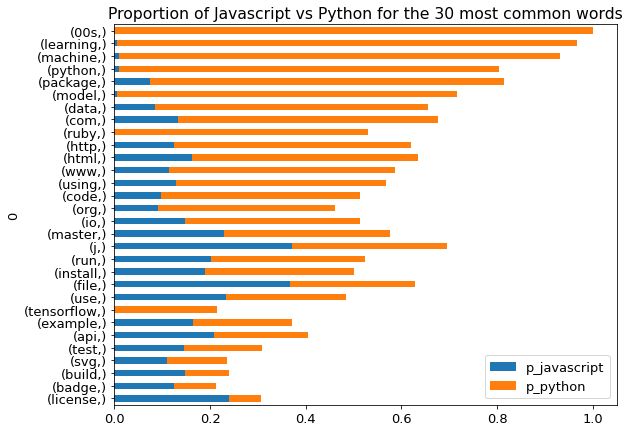

In [21]:
# figure out the percentage of javascript vs python
(word_counts
 .assign(p_javascript=word_counts.javascript / word_counts['all'],
         p_python=word_counts.python / word_counts['all'])
 .sort_values(by='all')
 [['p_javascript', 'p_python']]
 .tail(30)
 .sort_values('p_python')
 .plot.barh(stacked=True))

plt.title('Proportion of Javascript vs Python for the 30 most common words')

Text(0.5, 1.0, 'Proportion of Language for the 20 most common words')

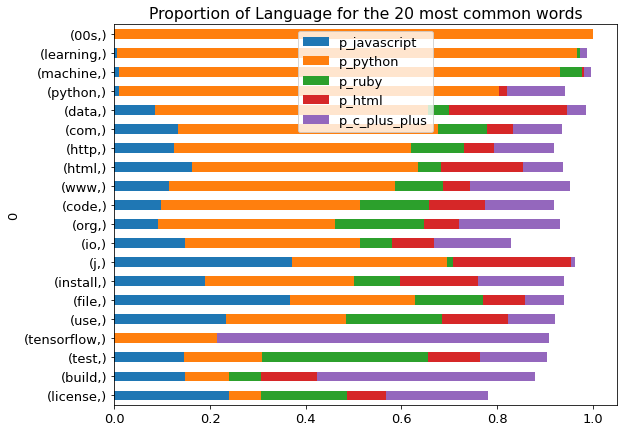

In [22]:
# figure out the percentage of language
(word_counts
 .assign(p_javascript=word_counts.javascript / word_counts['all'],
         p_python=word_counts.python / word_counts['all'],
         p_ruby=word_counts.ruby / word_counts['all'],
         p_html=word_counts.html / word_counts['all'],
         p_c_plus_plus=word_counts.c_plus_plus / word_counts['all'])
 .sort_values(by='all')
 [['p_javascript', 'p_python', 'p_ruby', 'p_html', 'p_c_plus_plus']]
 .tail(20)
 .sort_values('p_python')
 .plot.barh(stacked=True))

plt.title('Proportion of Language for the 20 most common words')

### Which words show up the most in each language versus all words?

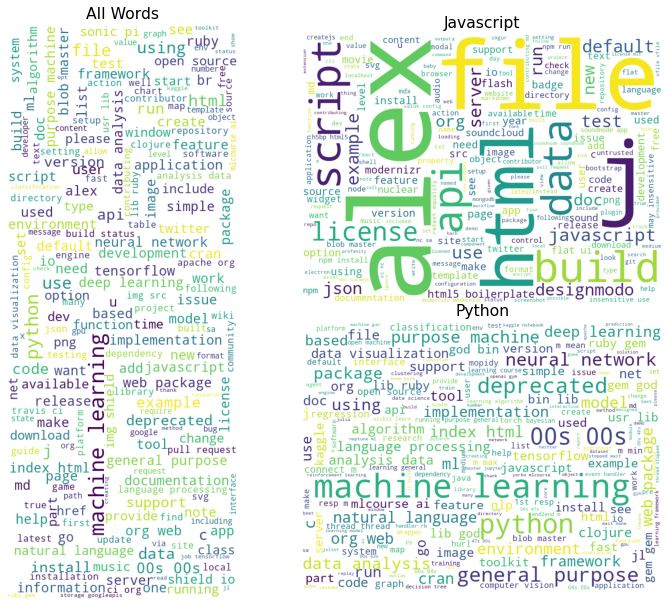

In [23]:
explore.word_cloud_1(all_words, javascript_words, python_words)

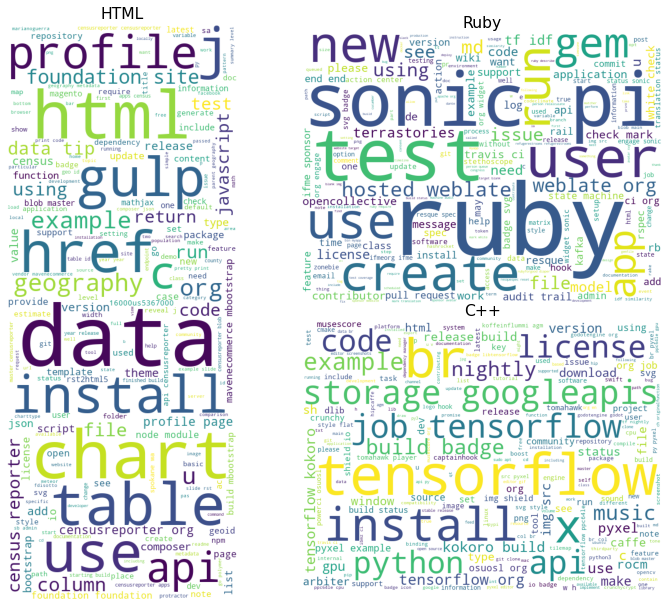

In [24]:
explore.word_cloud_2(html_words, ruby_words, c_plus_plus_words)

In [25]:
# Extra words to add: ['github', 'project', 'name', 'library']

## Model

In [26]:
from pprint import pprint

In [27]:
(pd.DataFrame({'raw_count': words.value_counts()})
 .assign(frequency=lambda df: df.raw_count / df.raw_count.sum())
 .assign(augmented_frequency=lambda df: df.frequency / df.frequency.max()))

NameError: name 'words' is not defined

## Conclusions and Takeaways